##Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. 

---



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mllabpg/lab5/heart.csv')#, header=None, sep='\s')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:
1. id: patient identification number
2. ccf: social security number (I replaced this with a dummy value of 0)
3. age: age in years
4. sex: sex (1 = male; 0 = female)
5. painloc: chest pain location (1 = substernal; 0 = otherwise)
6. painexer (1 = provoked by exertion; 0 = otherwise)
7. relrest (1 = relieved after rest; 0 = otherwise)
8. pncaden (sum of 5, 6, and 7)
9. cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11. htn
12. chol: serum cholestoral in mg/dl
13. smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14. cigs (cigarettes per day)
15. years (number of years as a smoker)
16. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17. dm (1 = history of diabetes; 0 = no such history)
18. famhist: family history of coronary artery disease (1 = yes; 0 = no)
19. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20. ekgmo (month of exercise ECG reading)
21. ekgday(day of exercise ECG reading)
22. ekgyr (year of exercise ECG reading)
23. dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24. prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25. nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26. pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27. diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28. proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29. thaldur: duration of exercise test in minutes
30. thaltime: time when ST measure depression was noted
31. met: mets achieved
32. thalach: maximum heart rate achieved
33. thalrest: resting heart rate
34. tpeakbps: peak exercise blood pressure (first of 2 parts)
35. tpeakbpd: peak exercise blood pressure (second of 2 parts)
36. dummy
37. trestbpd: resting blood pressure
38. exang: exercise induced angina (1 = yes; 0 = no)
39. xhypo: (1 = yes; 0 = no)
40. oldpeak = ST depression induced by exercise relative to rest
41. slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
42. rldv5: height at rest
43. rldv5e: height at peak exercise
44. ca: number of major vessels (0-3) colored by flourosopy
45. restckm: irrelevant
46. exerckm: irrelevant
47. restef: rest raidonuclid (sp?) ejection fraction
48. restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49. exeref: exercise radinalid (sp?) ejection fraction
50. exerwm: exercise wall (sp?) motion
51. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52. thalsev: not used
53. thalpul: not used
54. earlobe: not used
55. cmo: month of cardiac cath (sp?) (perhaps "call")
56. cday: day of cardiac cath (sp?)
57. cyr: year of cardiac cath (sp?)
58. num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)
59. lmt
60. ladprox
61. laddist
62. diag
63. cxmain
64. ramus
65. om1
66. om2
67. rcaprox
68. rcadist
69. lvx1: not used
70. lvx2: not used
71. lvx3: not used
72. lvx4: not used
73. lvf: not used
74. cathef: not used
75. junk: not used
76. name: last name of patient (I replaced this with the dummy string "name")







In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
comatrix = data.corr()

<Axes: >

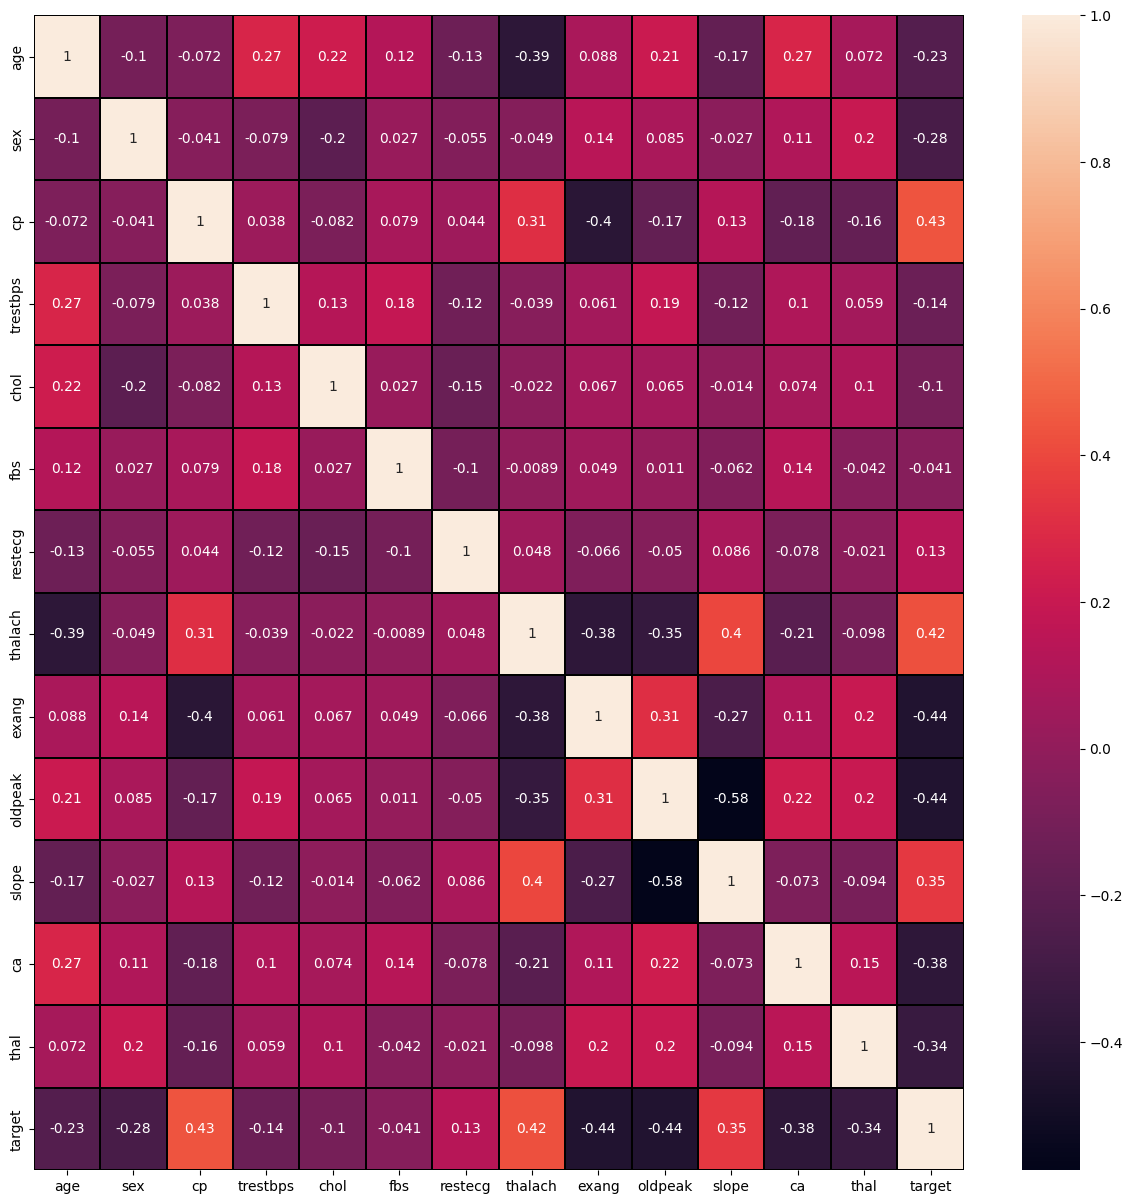

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(comatrix,annot = True,linecolor ='black', linewidths = .3)

<Axes: ylabel='Frequency'>

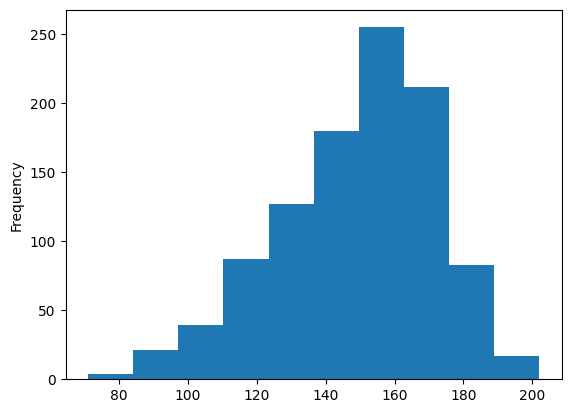

In [ ]:
data.thalach.plot.hist()

In [ ]:
sds = data.loc[(data['thalach']>=140) & (data['thalach']<=180)]
sds.target.value_counts()

1    400
0    266
Name: target, dtype: int64

In [ ]:
sds2 = data.loc[(data['thalach']<140) | (data['thalach']>180)]
sds2.target.value_counts()

0    233
1    126
Name: target, dtype: int64

In [ ]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,86,226
1,413,300


<Axes: xlabel='sex'>

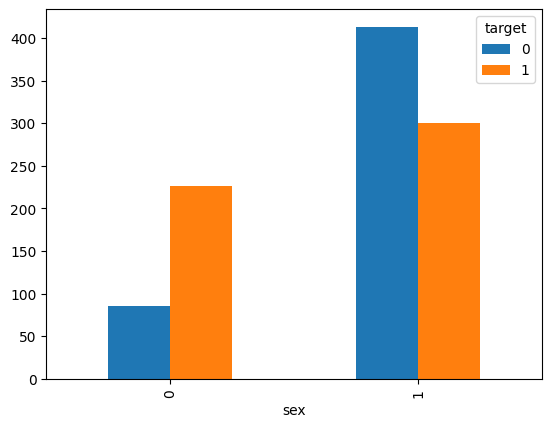

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind = 'bar')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.4% of the points cannot be placed; y

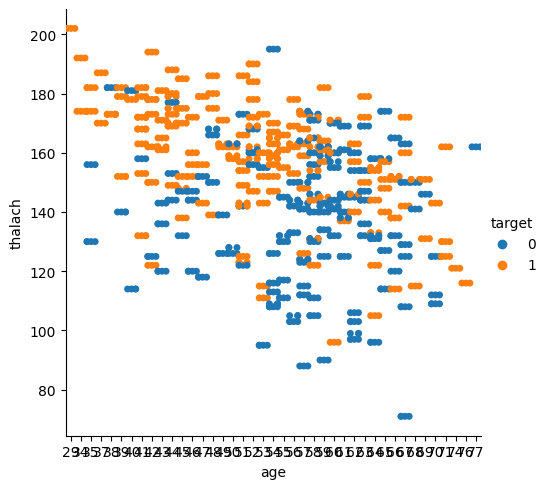

In [ ]:
sns.catplot(data, kind="swarm", x="age", y="thalach", hue="target")